In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/multi_featm_cicids_rfe.csv")

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#results storage and save function
results = {}



In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV

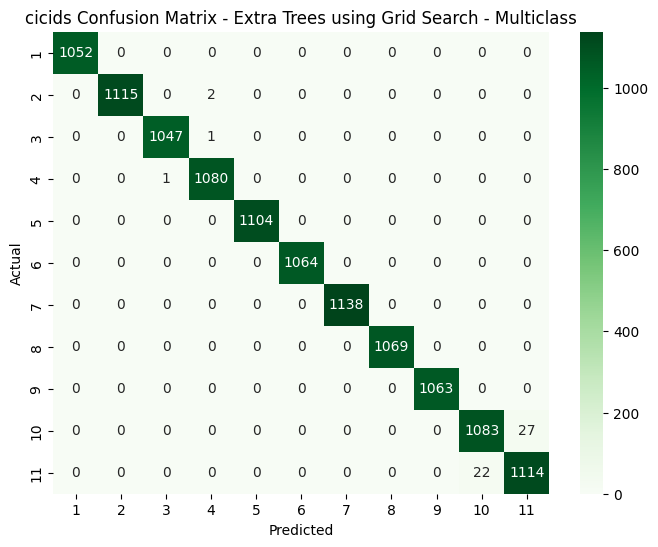

{'Best Params': {'max_depth': 30, 'n_estimators': 150}, 'Accuracy': 0.9955766983809047, 'Precision': 0.9957002511864068, 'Recall': 0.9956945182130599, 'F1 Score': 0.9956963523565779}


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Updated parameter grid
param_grid_et = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 15, 30]
}

# GridSearchCV
grid_et = GridSearchCV(
    estimator=ExtraTreesClassifier(random_state=42),
    param_grid=param_grid_et,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_et.fit(X_train, y_train)
best_et = grid_et.best_estimator_

# Predict on the test set
y_pred_et = best_et.predict(X_test)

# Metrics (for multiclass)
accuracy = accuracy_score(y_test, y_pred_et)
precision = precision_score(y_test, y_pred_et, average='macro')
recall = recall_score(y_test, y_pred_et, average='macro')
f1 = f1_score(y_test, y_pred_et, average='macro')

# Save results
results["ExtraTrees"] = {
    "Best Params": grid_et.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion Matrix
class_labels = np.unique(np.concatenate((y_train, y_test)))
class_labels = np.array([label for label in class_labels if label != 0])  # remove 0 if needed

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_et, labels=class_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("cicids Confusion Matrix - Extra Trees using Grid Search - Multiclass")
plt.savefig("cicids_confusion_matrix_extratrees_gridsearch_multiclass.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["ExtraTrees"])


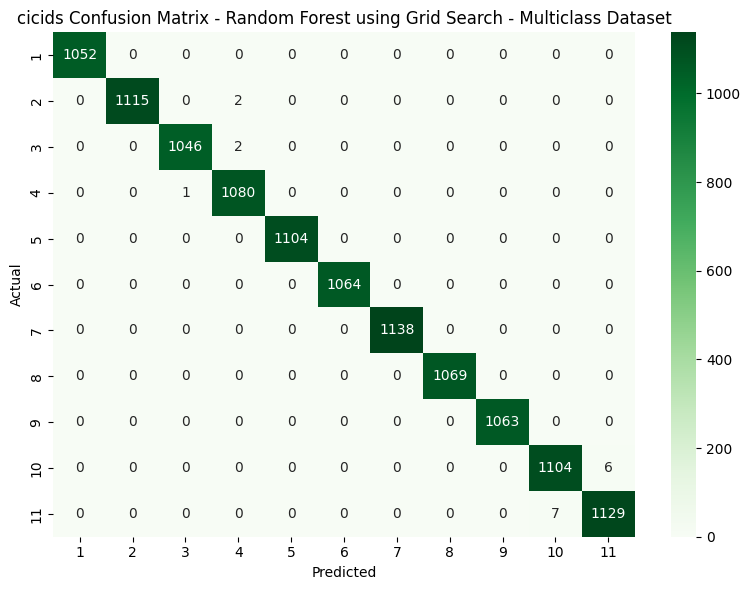

{'Best Params': {'max_depth': 20, 'n_estimators': 50}, 'Accuracy': 0.9984977466199298, 'Precision': 0.9984986754537901, 'Recall': 0.9984977466199298, 'F1 Score': 0.9984979065756814}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Label encoding for multiclass
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
n_classes = len(le.classes_)

# Updated parameter grid for Grid Search
param_grid_rf = {
    'n_estimators': [50, 75, 100],
    'max_depth': [5, 10, 20]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grid Search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train_encoded)

# Best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_encoded = best_rf_model.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save results
results["RandomForest"] = {
    "Best Params": grid_search_rf.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("cicids Confusion Matrix - Random Forest using Grid Search - Multiclass Dataset")
plt.tight_layout()
plt.savefig("cicids_confusion_matrix_randomforest_gridsearch_multi_.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["RandomForest"])


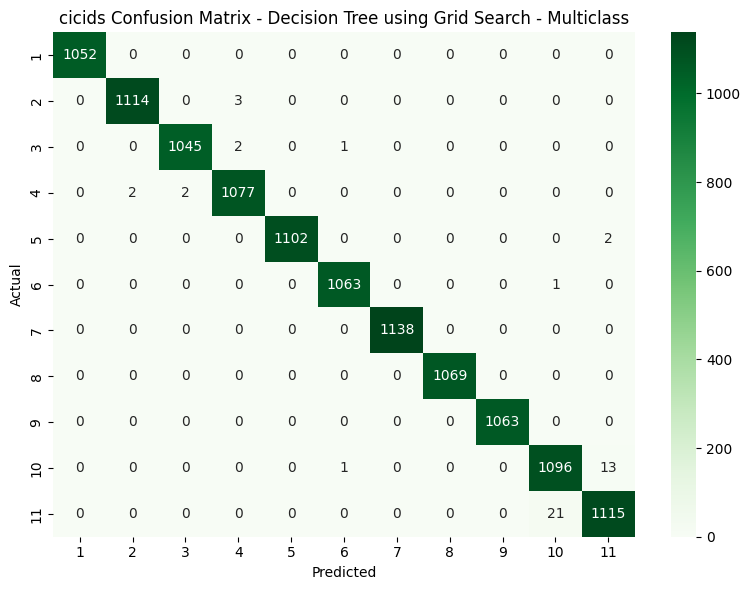

{'Best Params': {'max_depth': 15, 'min_samples_split': 2}, 'Accuracy': 0.9959939909864797, 'Precision': 0.9960007156255773, 'Recall': 0.9959939909864797, 'F1 Score': 0.9959953710878201}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Encode labels for multiclass
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
n_classes = len(le.classes_)

# Updated parameter grid
param_grid_dt = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
}

# Set up GridSearchCV
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_dt.fit(X_train, y_train_encoded)

# Best model and predictions
best_dt = grid_dt.best_estimator_
y_pred_encoded = best_dt.predict(X_test)
y_pred_dt = le.inverse_transform(y_pred_encoded)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

# Save results
results["DecisionTree"] = {
    "Best Params": grid_dt.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_dt, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("cicids Confusion Matrix - Decision Tree using Grid Search - Multiclass")
plt.tight_layout()
plt.savefig("cicids_confusion_matrix_decisiontree_gridsearch_multi.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["DecisionTree"])


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


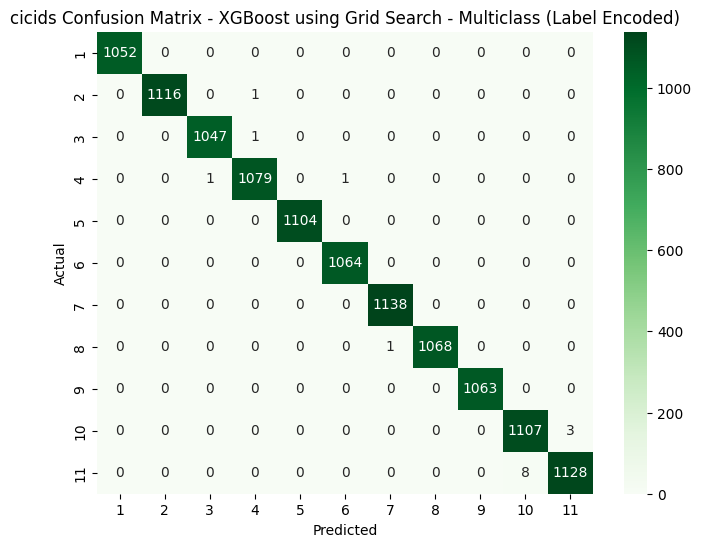

{'Best Params': {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}, 'Accuracy': 0.9986646636621599, 'Precision': 0.9986864840653031, 'Recall': 0.9986927270636112, 'F1 Score': 0.9986886329760936}


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Updated parameter grid
param_grid_xgb = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]
}

# GridSearchCV setup
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='merror'),
    param_grid=param_grid_xgb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Fit model
grid_xgb.fit(X_train, y_train_encoded)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
precision = precision_score(y_test_encoded, y_pred_xgb, average='macro')
recall = recall_score(y_test_encoded, y_pred_xgb, average='macro')
f1 = f1_score(y_test_encoded, y_pred_xgb, average='macro')

# Save results
results["XGBoost"] = {
    "Best Params": grid_xgb.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion Matrix
num_classes = len(le.classes_)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, y_pred_xgb, labels=list(range(num_classes)))

sns.heatmap(
    cm, annot=True, fmt="d", cmap="Greens",
    xticklabels=[str(i + 1) for i in range(num_classes)],
    yticklabels=[str(i + 1) for i in range(num_classes)]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("cicids Confusion Matrix - XGBoost using Grid Search - Multiclass (Label Encoded)")
plt.savefig("cicids_confusion_matrix_xgboost_gridsearch_multiclass.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["XGBoost"])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5096
[LightGBM] [Info] Number of data points in the train set: 47924, number of used features: 20
[LightGBM] [Info] Start training from score -2.389376
[LightGBM] [Info] Start training from score -2.404280
[LightGBM] [Info] Start training from score -2.388467
[LightGBM] [Info] Start training from score -2.395998
[LightGBM] [Info] Start training from score -2.401281
[LightGBM] [Info] Start training from score -2.392111
[LightGBM] [Info] Start training from score -2.409143
[LightGBM] [Info] Start training from score -2.393253
[LightGBM] [Info] Start training from score -2.391883
[LightGBM] [Info] Start training from score -2.402664
[LightGBM] [Info] Start tra

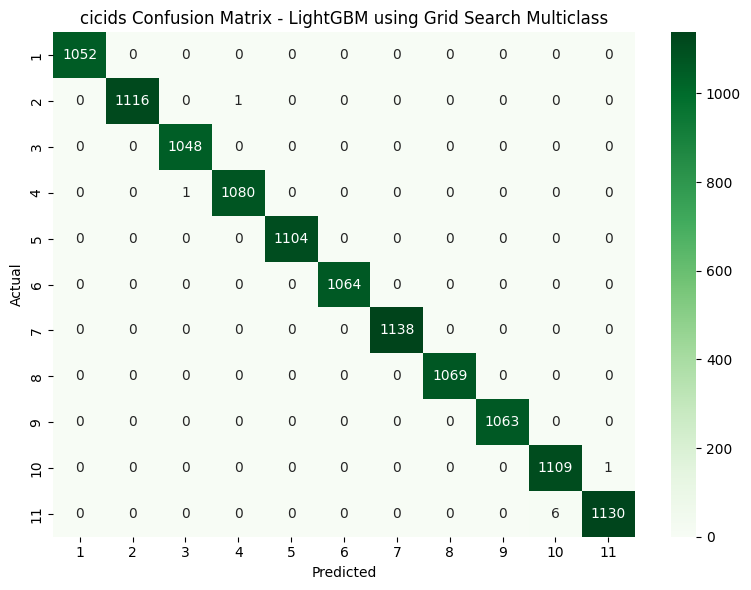

{'Best Params': {'learning_rate': 0.1, 'n_estimators': 150, 'num_leaves': 40}, 'Accuracy': 0.9992488733099649, 'Precision': 0.9992508294318105, 'Recall': 0.9992488733099649, 'F1 Score': 0.9992488866831382}


In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'num_leaves': [20, 40, 60],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize LGBMClassifier for multiclass
lgb = LGBMClassifier(random_state=42, objective='multiclass', num_class=len(np.unique(y_train)))

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=lgb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_lgb_model = grid_search.best_estimator_
y_pred_lgb = best_lgb_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lgb)
precision = precision_score(y_test, y_pred_lgb, average='weighted')
recall = recall_score(y_test, y_pred_lgb, average='weighted')
f1 = f1_score(y_test, y_pred_lgb, average='weighted')

# Save results
results["LightGBM"] = {
    "Best Params": grid_search.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lgb)

# Dynamically generate proper class labels
unique_labels = np.unique(np.concatenate((y_test, y_pred_lgb)))

sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=unique_labels,
            yticklabels=unique_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("cicids Confusion Matrix - LightGBM using Grid Search Multiclass")
plt.tight_layout()
plt.savefig("cicids_confusion_matrix_lightgbm_gridsearch_multiclass.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["LightGBM"])


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.9 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


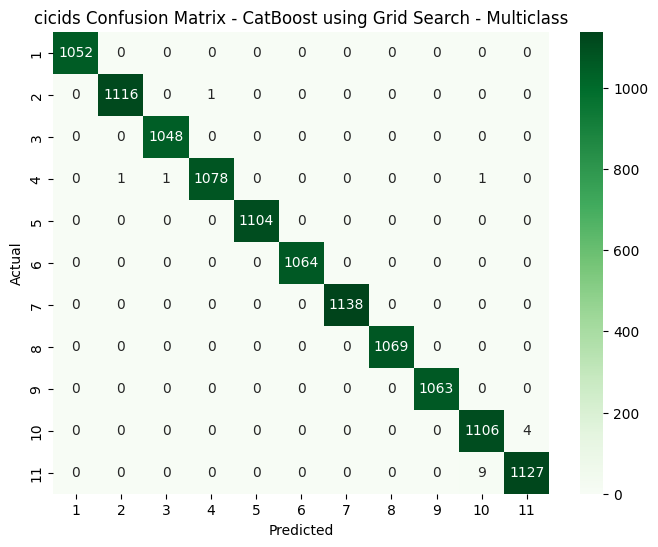

{'Best Params': {'depth': 8, 'iterations': 200, 'learning_rate': 0.2}, 'Accuracy': 0.9985812051410449, 'Precision': 0.9986115822979891, 'Recall': 0.998618490717891, 'F1 Score': 0.9986138420260697}


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Label Encoding
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Updated parameter grid
param_grid_cat = {
    'iterations': [100, 150, 200],
    'depth': [6, 7, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up GridSearchCV
grid_cat = GridSearchCV(
    estimator=CatBoostClassifier(verbose=0, random_state=42),
    param_grid=param_grid_cat,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_cat.fit(X_train, y_train_encoded)

# Get best model and predictions
best_cat = grid_cat.best_estimator_
y_pred_cat = best_cat.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred_cat)
precision = precision_score(y_test_encoded, y_pred_cat, average='macro')
recall = recall_score(y_test_encoded, y_pred_cat, average='macro')
f1 = f1_score(y_test_encoded, y_pred_cat, average='macro')

# Save results
results["CatBoost"] = {
    "Best Params": grid_cat.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
num_classes = len(le.classes_)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, y_pred_cat, labels=list(range(num_classes)))

sns.heatmap(
    cm, annot=True, fmt="d", cmap="Greens",
    xticklabels=[str(i+1) for i in range(num_classes)],
    yticklabels=[str(i+1) for i in range(num_classes)]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("cicids Confusion Matrix - CatBoost using Grid Search - Multiclass")
plt.savefig("cicids_confusion_matrix_catboost_gridsearch_multiclass.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["CatBoost"])


In [ ]:
print(results)

{'ExtraTrees': {'Best Params': {'max_depth': 30, 'n_estimators': 150}, 'Accuracy': 0.9955766983809047, 'Precision': 0.9957002511864068, 'Recall': 0.9956945182130599, 'F1 Score': 0.9956963523565779}, 'RandomForest': {'Best Params': {'max_depth': 20, 'n_estimators': 50}, 'Accuracy': 0.9984977466199298, 'Precision': 0.9984986754537901, 'Recall': 0.9984977466199298, 'F1 Score': 0.9984979065756814}, 'DecisionTree': {'Best Params': {'max_depth': 15, 'min_samples_split': 2}, 'Accuracy': 0.9959939909864797, 'Precision': 0.9960007156255773, 'Recall': 0.9959939909864797, 'F1 Score': 0.9959953710878201}, 'XGBoost': {'Best Params': {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}, 'Accuracy': 0.9986646636621599, 'Precision': 0.9986864840653031, 'Recall': 0.9986927270636112, 'F1 Score': 0.9986886329760936}, 'LightGBM': {'Best Params': {'learning_rate': 0.1, 'n_estimators': 150, 'num_leaves': 40}, 'Accuracy': 0.9992488733099649, 'Precision': 0.9992508294318105, 'Recall': 0.99924887330996

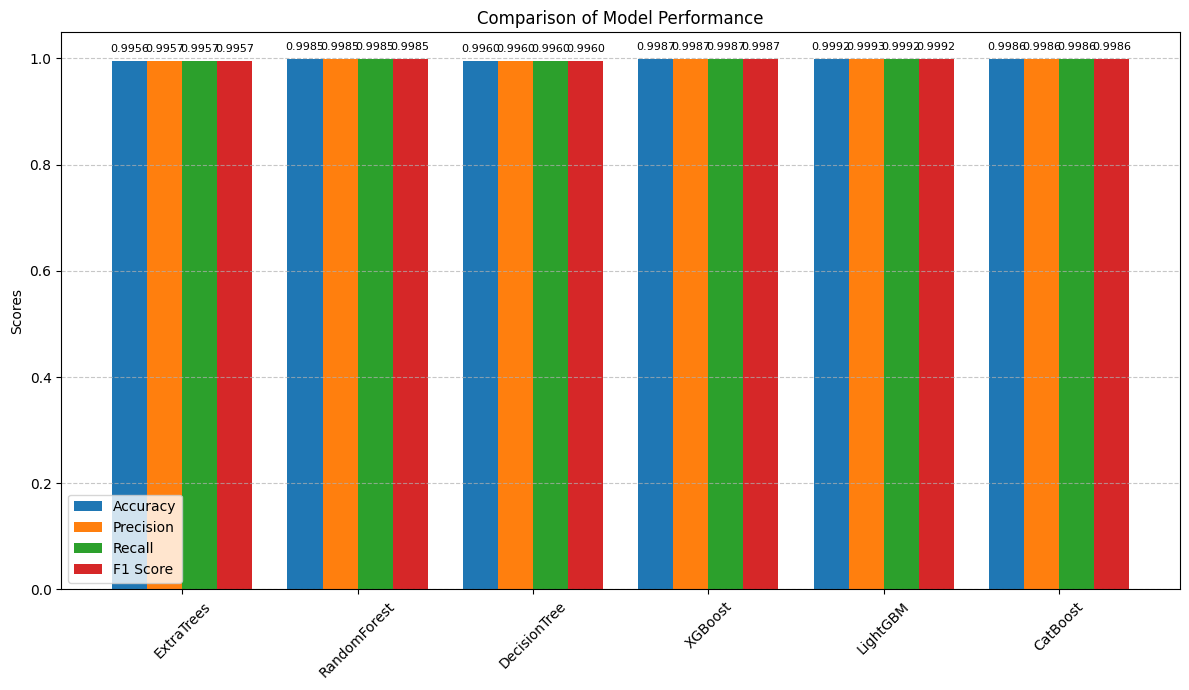

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models = list(results.keys())
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Prepare data for plotting
data = {metric: [results[model][metric] for model in models] for metric in metric_names}

# Plotting
x = np.arange(len(models))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Create bars for each metric
rects1 = ax.bar(x - 1.5*width, data['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, data['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, data['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, data['F1 Score'], width, label='F1 Score')

# Labels and Title
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars
def autolabel(rects):
    """Attach a text label above each bar."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

for rects in [rects1, rects2, rects3, rects4]:
    autolabel(rects)

fig.tight_layout()

# Save the plot with 800 dpi
plt.savefig('cicids_model_comparison_plot_usg_grid_hyp_multi_updated_final.png', dpi=800)

# Display the plot
plt.show()
